# Data Exploration

## Set Up

set up environments and load the data

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [53]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [54]:
%matplotlib notebook

In [66]:
data_path = os.path.abspath(os.pardir + '/Data/validation.csv')
df = pd.read_csv(data_path, na_values=['Na', 'null']).fillna(0)

## Correlations

In [45]:
def numericalize_labels(self):
    """
    numericalizes categorical columns in pandas dataframe
    """
    le = LabelEncoder()
    le_mapping = dict()
    data = df
    for col in data.columns.values:
        #print("numericalizing", col)
        # Encoding only categorical variables
        if data[col].dtypes == "object":
            # Using whole data to form an exhaustive list of levels
            categoricals = data[col].append(data[col])
            le.fit(categoricals.values.astype(str))
            # safe mapped data
            data[col] = le.transform(data[col].astype(str))
            # safe mapping
            le_mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    df_num = data
    df_num_mapping = le_mapping
    
    return df_num, df_num_mapping
    
df_num, df_num_mapping = numericalize_labels(df)

[0.00044369 0.00434646 0.00077342 0.00012006 0.02623377 0.00029887
 0.00052128 0.00060029 0.00827631 0.00033485 0.00622649 0.
 0.00428031 0.00184039 0.0027719  0.00069123 0.01439462 0.00316015
 0.00325515 0.0006914  0.00227415]
[1.41657395e-02 1.32100944e-02 1.44627461e-03 8.99055855e-06
 1.30238338e-02 2.37494988e-03 1.28652959e-02 1.22676278e-02
 1.35395939e-01 1.38661673e-01 1.78821226e-03 0.00000000e+00
 1.08878355e-02 9.42300436e-02 9.07853575e-02 7.86910675e-03
 1.30104532e-01 1.82469542e-01 4.93219807e-02 6.96885563e-02
 3.15122781e-02]


<IPython.core.display.Javascript object>


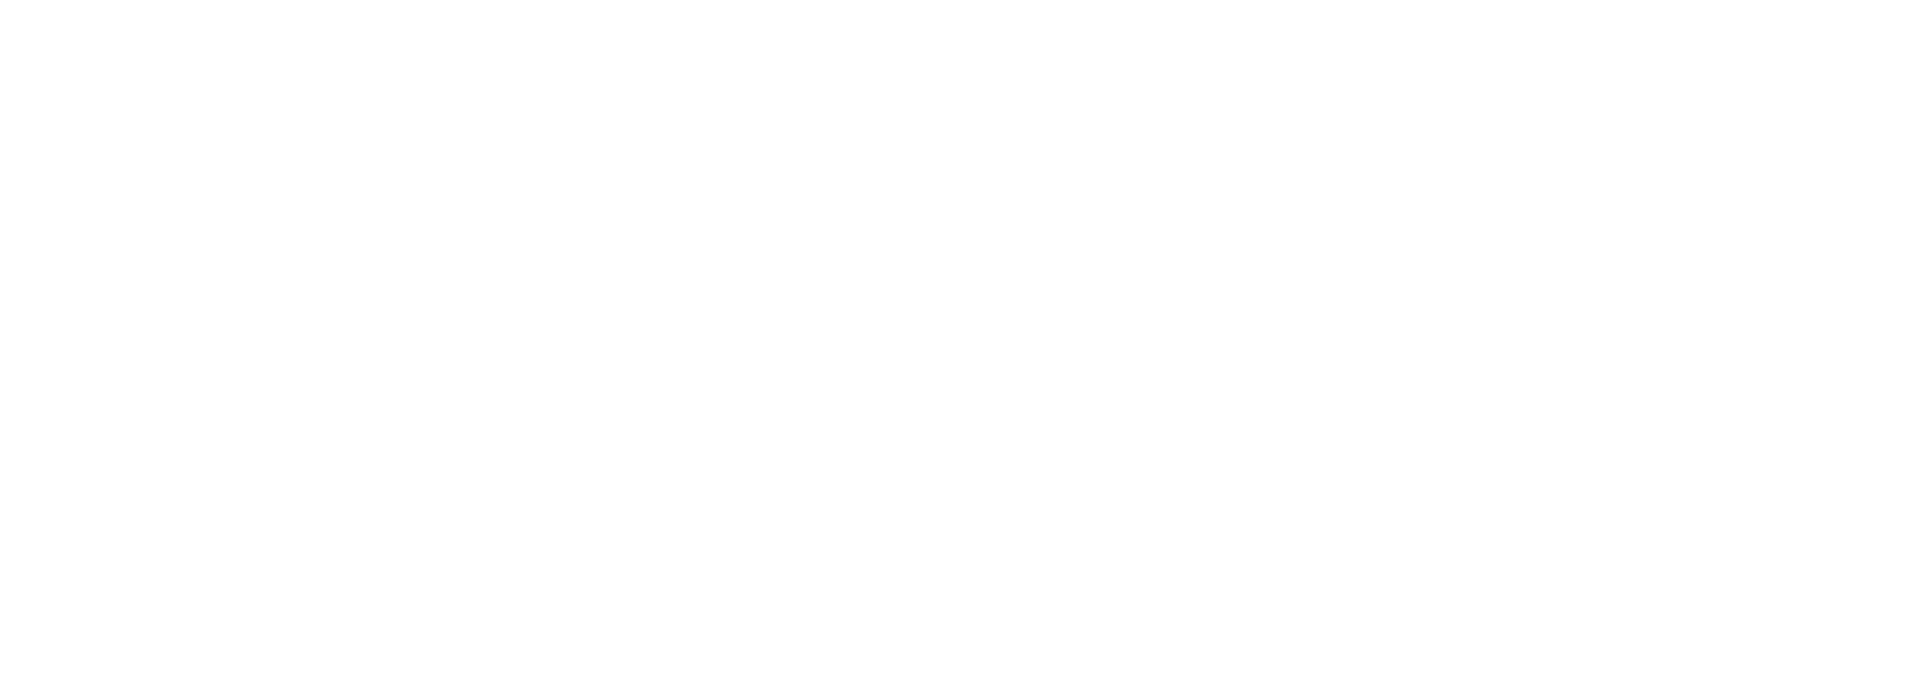

Text(0.5,0,'Feature')

Text(0,0.5,'Absolute Pearson Correlation')

Text(0.5,1,'Correlation between Targets and Features')

([<matplotlib.axis.XTick at 0x13b058a58>,
 <a list of 21 Text xticklabel objects>)

In [50]:
#df['click'].corr(df)
correlations_df = df_num.corr(method ='pearson') 
correlations_df.drop(['click', 'payprice', 'bidprice', 'advertiser'], inplace= True)

feature_list = list(correlations_df.index.values)

click_correlation = np.nan_to_num(np.asarray(correlations_df["click"]))
payprice_correlation = np.nan_to_num(np.asarray(correlations_df["payprice"]))

click_correlation = np.absolute(click_correlation)
payprice_correlation = np.absolute(payprice_correlation)

print(click_correlation)
print(payprice_correlation)


# Plotting ______________________________________

color_schema = ['cadetblue', 'midnightblue']

# data to plot
n_groups = len(feature_list)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, click_correlation, bar_width,
alpha=opacity,
color='cadetblue',
label='click')
 
rects2 = plt.bar(index + bar_width, payprice_correlation, bar_width,
alpha=opacity,
color='midnightblue',
label='payprice')
 
plt.xlabel('Feature')
plt.ylabel('Absolute Pearson Correlation', fontweight = "bold")
plt.title('Correlation between Targets and Features', fontweight = "bold")
plt.xticks(index + bar_width, feature_list, rotation=40, ha="right")
plt.legend(title="targets")
 
plt.tight_layout()
plt.show()


## number of impressions

In [26]:
print(df.count(axis = 0))

click             2430981
weekday           2430981
hour              2430981
bidid             2430981
userid            2430981
useragent         2430981
IP                2430981
region            2430981
city              2430981
adexchange        2430981
domain            2430981
url               2430981
urlid             2430981
slotid            2430981
slotwidth         2430981
slotheight        2430981
slotvisibility    2430981
slotformat        2430981
slotprice         2430981
creative          2430981
bidprice          2430981
payprice          2430981
keypage           2430981
advertiser        2430981
usertag           2430981
dtype: int64


## number of clicks

In [27]:
print(pd.value_counts(df['click'].values))

print((pd.value_counts(df['click'].values)[1] / pd.value_counts(df['click'].values)[0])*100)

0    2429188
1       1793
dtype: int64
0.0738106725374899


## costs (bid prize, pay prize,  slot prize)

In [28]:
print("Mean bid value:", df['bidprice'].mean(axis=0)) # average bid price
print("Max bid value:", df['bidprice'].max(axis=0)) # maximum bid price
print("Min bid value:", df['bidprice'].min(axis=0)) # maximum bid price
print()
print(df['bidprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])) # quantiles

Mean bid value: 272.9620461862927
Max bid value: 300
Min bid value: 227

0.00    227.0
0.25    241.0
0.50    294.0
0.75    300.0
1.00    300.0
Name: bidprice, dtype: float64


In [29]:
print("Mean pay price",df['payprice'].mean(axis=0)) # average pay price
print("Max pay price", df['payprice'].max(axis=0)) # maximum pay price
print("Min pay price", df['payprice'].min(axis=0)) # minimum pay price
print()
print(df['payprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])) # quantiles\

Mean pay price 78.15141623895867
Max pay price 300
Min pay price 0

0.00      0.0
0.25     33.0
0.50     68.0
0.75     99.0
1.00    300.0
Name: payprice, dtype: float64


In [30]:
print(df['slotprice'].mean(axis=0)) # average bid prize
print(df['slotprice'].max(axis=0)) # maximum bid prize
print(df['slotprice'].min(axis=0)) # minimum bid prize

print('\n', df['slotprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])) # quantiles\

26.71782502619313
300
0

 0.00      0.0
0.25      0.0
0.50      5.0
0.75     50.0
1.00    300.0
Name: slotprice, dtype: float64


In [31]:
print((df['bidprice']-df['payprice']).mean(axis=0)) # average between bidprice and payprice
print((df['payprice']-df['slotprice']).mean(axis=0)) # average between payprice and slotprice

194.810629947334
51.43359121276555


<IPython.core.display.Javascript object>


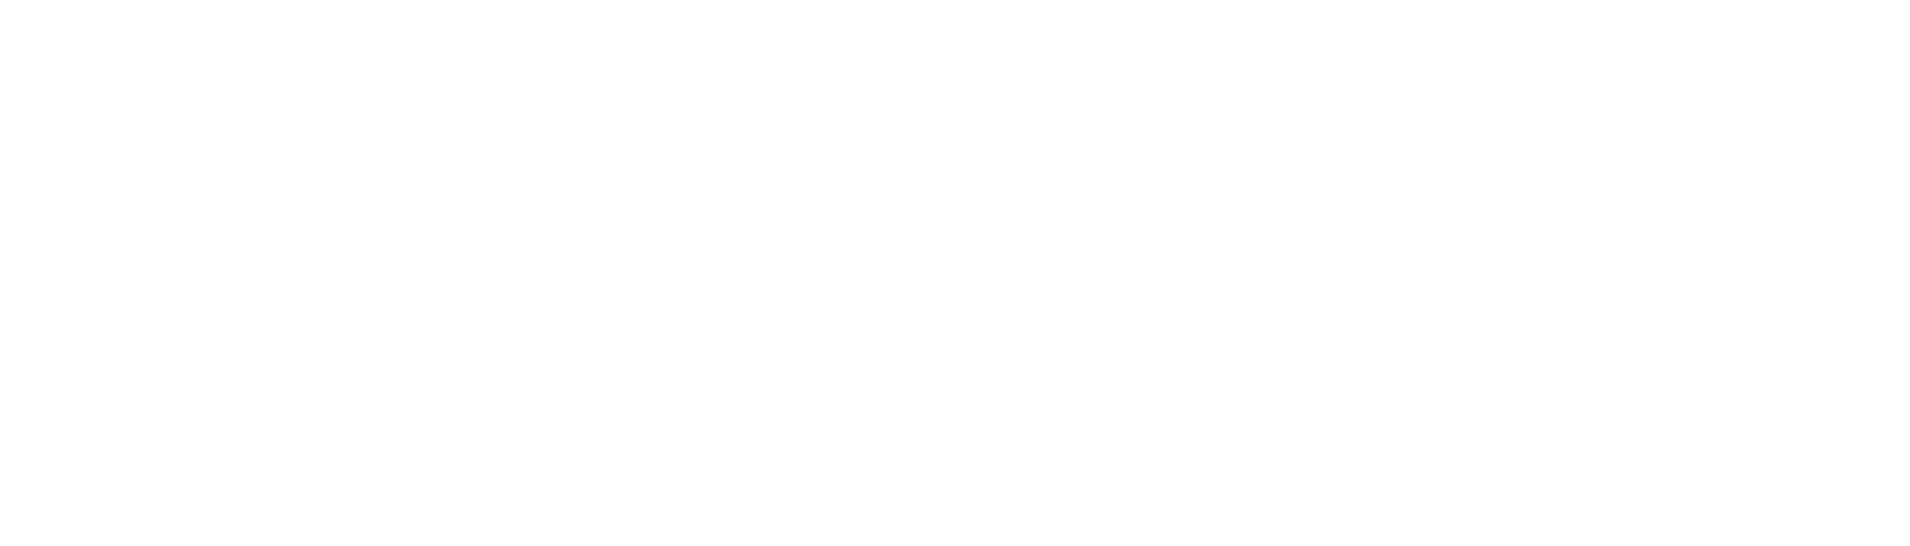

In [69]:
data = [df['bidprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0]), df['payprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0]), df['slotprice'].quantile([0.0, 0.25, 0.5, 0.75, 1.0])]

fig, ax = plt.subplots()

violin_parts = ax.violinplot(data,showmeans=False, showmedians=True, widths = 0.5)
#ax.boxplot(data, 1, whis = 10.5, patch_artist = True)
ax.set_title("Cost Quartile Distributions", fontweight="bold")
ax.yaxis.grid(color='grey', linestyle='-', linewidth=0.6)
plt.xticks([1, 2, 3], ['bidprice', 'payprice', 'slotprice'])
#plt.ylabel("Average Cost per Mille in CNY")

violin_parts['cbars'].set_linewidth(1)
violin_parts['cbars'].set_color("black")

violin_parts['cmaxes'].set_linewidth(1)
violin_parts['cmaxes'].set_color("black")

violin_parts['cmins'].set_linewidth(1)
violin_parts['cmins'].set_color("black")

violin_parts['cmedians'].set_linewidth(4)
violin_parts['cmedians'].set_color("black")

# customize the violin
for vp in violin_parts['bodies']:
    vp.set_facecolor("cadetblue")
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

plt.show();

## click-through rate CTR

In [11]:
print("Unique Users:", len(df['userid'].unique()))  # unique users
print("Unqiue Advertisers:", len(df['advertiser'].unique()))  # unique advertisers

Unique Users: 2342677
Unqiue Advertisers: 9


In [12]:
df.groupby(['advertiser']).count()  # Total Bids per Advertiser

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotwidth,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,usertag
advertiser,,,,,,,,,,,,,,,,,,,,,
1458,492353,492353,492353,492353,492353,492353,492353,492353,492353,492353,...,492353,492353,492353,492353,492353,492353,492353,492353,492353,492353
2259,133673,133673,133673,133673,133673,133673,133673,133673,133673,133673,...,133673,133673,133673,133673,133673,133673,133673,133673,133673,133673
2261,110122,110122,110122,110122,110122,110122,110122,110122,110122,110122,...,110122,110122,110122,110122,110122,110122,110122,110122,110122,110122
2821,211366,211366,211366,211366,211366,211366,211366,211366,211366,211366,...,211366,211366,211366,211366,211366,211366,211366,211366,211366,211366
2997,49829,49829,49829,49829,49829,49829,49829,49829,49829,49829,...,49829,49829,49829,49829,49829,49829,49829,49829,49829,49829
3358,264956,264956,264956,264956,264956,264956,264956,264956,264956,264956,...,264956,264956,264956,264956,264956,264956,264956,264956,264956,264956
3386,455041,455041,455041,455041,455041,455041,455041,455041,455041,455041,...,455041,455041,455041,455041,455041,455041,455041,455041,455041,455041
3427,402806,402806,402806,402806,402806,402806,402806,402806,402806,402806,...,402806,402806,402806,402806,402806,402806,402806,402806,402806,402806
3476,310835,310835,310835,310835,310835,310835,310835,310835,310835,310835,...,310835,310835,310835,310835,310835,310835,310835,310835,310835,310835


In [13]:
df.groupby(['advertiser']).mean()  # Click-Through Rates per Advertiser

,click,weekday,hour,region,city,adexchange,urlid,slotwidth,slotheight,slotformat,slotprice,bidprice,payprice
advertiser,,,,,,,,,,,,,
1458,0.000782,2.995215,14.071445,144.312473,149.355330,2.027846,0.0,596.508249,204.694863,0.337288,28.275305,300.000000,68.992646
2259,0.000322,3.112895,10.480853,216.000000,222.848391,1.952249,0.0,506.677803,191.845399,0.000000,24.529157,288.078939,92.974931
2261,0.000327,4.403498,11.964285,139.525109,143.821925,1.993889,0.0,498.512577,217.682570,0.000000,27.127967,287.877981,89.662184
2821,0.000620,0.656827,16.050997,141.102732,145.679632,2.764513,0.0,611.500809,185.094008,0.000000,23.308943,290.224894,89.077922
2997,0.004355,3.531116,17.154227,153.235064,157.645748,0.000000,0.0,320.000000,50.000000,0.000000,33.779586,277.000000,62.800116
3358,0.000762,3.222120,12.144062,152.834255,157.709752,1.672632,0.0,561.837830,197.195572,0.547023,17.419896,232.981091,84.720599
3386,0.000703,3.006035,13.779347,145.088774,149.961441,2.200648,0.0,580.857817,183.502366,0.275725,29.499239,300.000000,76.766320
3427,0.000675,3.116825,13.722705,146.293370,151.283074,2.138687,0.0,621.612533,177.090783,0.280418,29.293809,236.388882,75.616329
3476,0.000602,2.748860,12.490978,144.622372,149.276166,2.104564,0.0,574.649168,190.843245,0.299217,26.748307,247.856152,76.950083


In [14]:
#matplotlib notebook

## plot colours

In [58]:
color_schema = ['cadetblue', 'midnightblue']

<IPython.core.display.Javascript object>


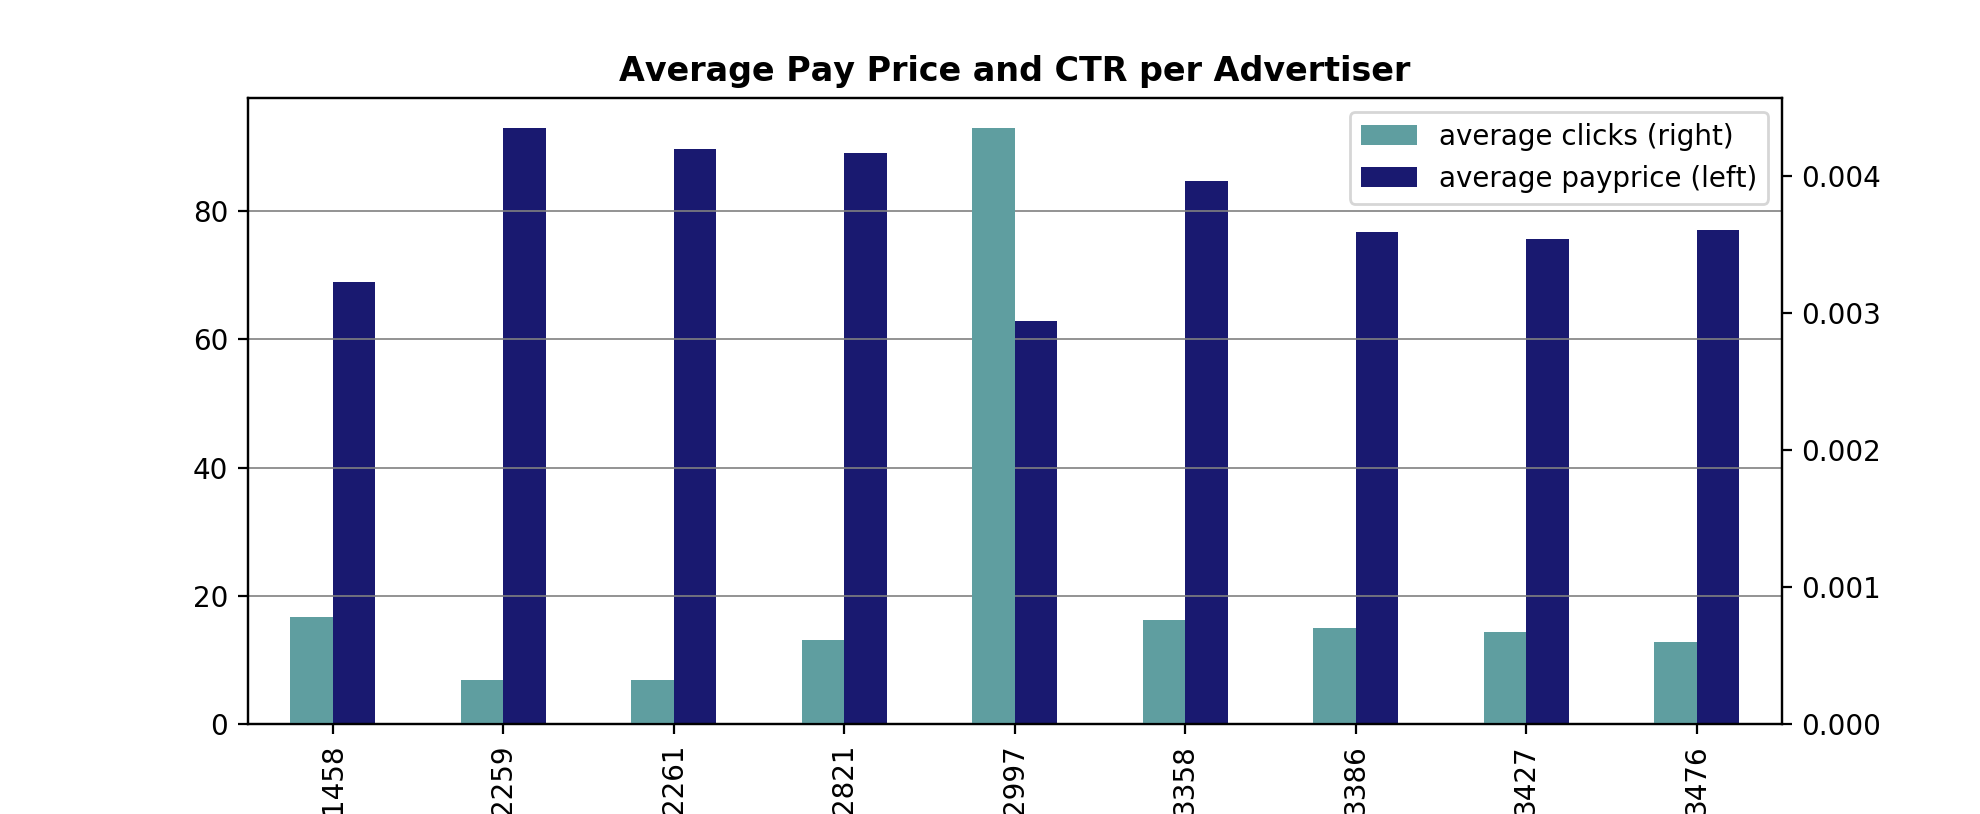

Text(0.5,1,'Average Pay Price and CTR per Advertiser')

In [65]:
advertiser_mean = df.groupby(['advertiser']).mean()
df_plot = pd.DataFrame(df.groupby(['advertiser']).mean(), columns = [ 'click' , 'payprice'])
df_plot.rename(index=str, columns={'click': 'average clicks', 'payprice': 'average payprice (left)'}, inplace=True)

ax = df_plot.plot.bar(sharey=False, secondary_y = 'average clicks', title = "Average Pay Price and CTR per Advertiser", color=color_schema)
ax.set_title("Average Pay Price and CTR per Advertiser", fontweight = "bold")
ax.yaxis.grid(color='grey', linestyle='-', linewidth=0.6, zorder=0)


In [17]:
print(df['click'].mean()) # Average Click-Through Rate

0.0007375623256619447


## Time Series

<IPython.core.display.Javascript object>


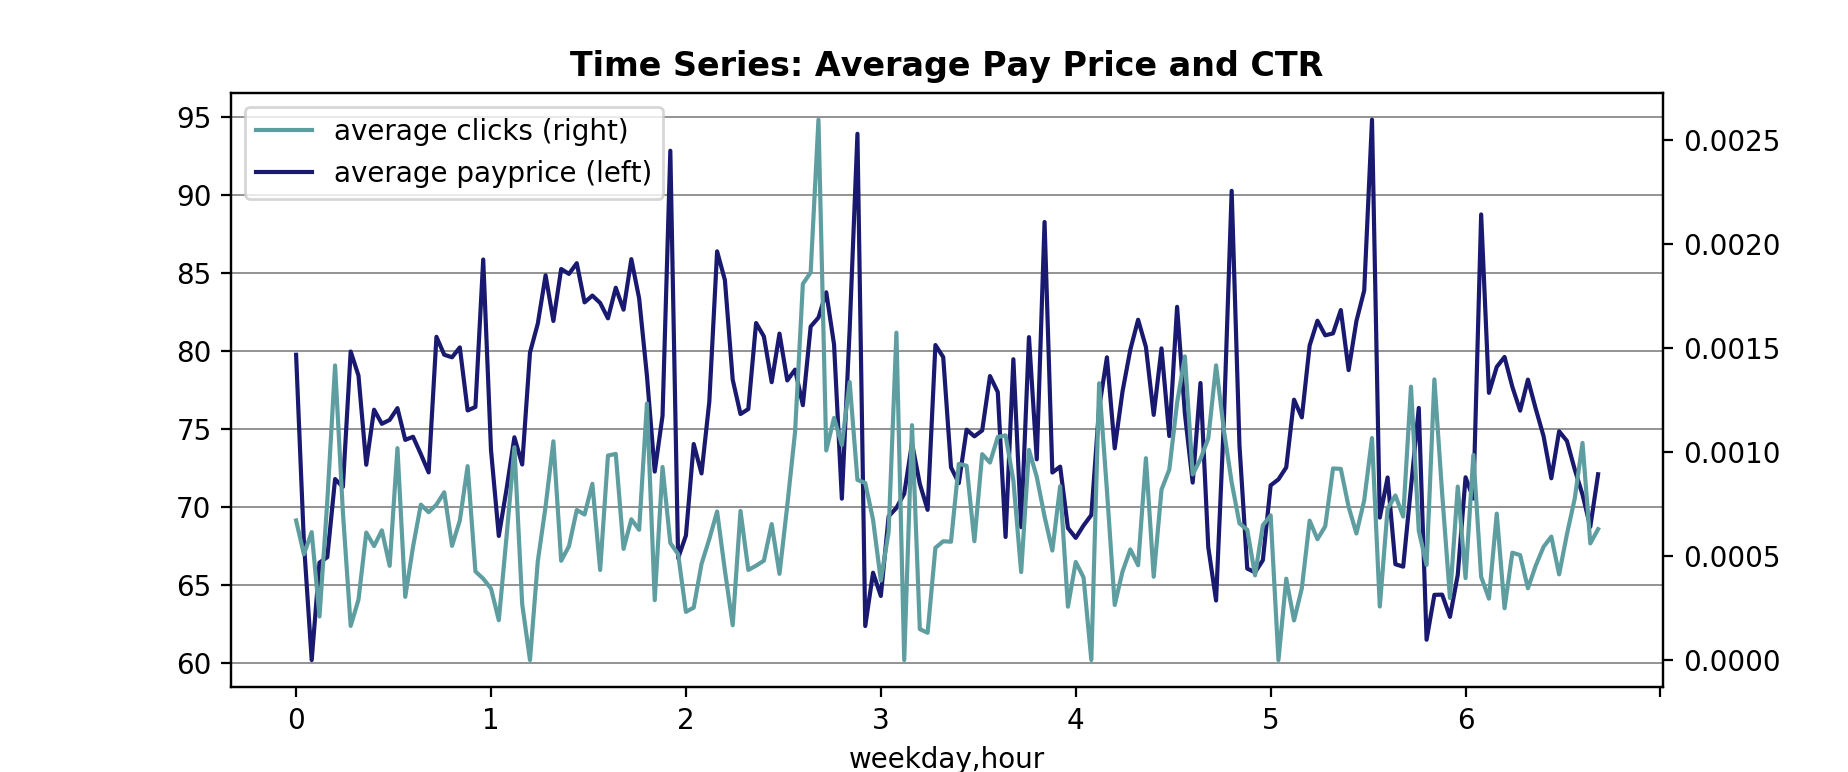

[Text(0,0,''),
 Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6')]

Text(0.5,1,'Time Series: Average Pay Price and CTR')

In [62]:
time_df = pd.DataFrame(df.groupby(['weekday','hour']).mean(), columns = ['click' , 'payprice'])
time_df.rename(index=str, columns={'click': 'average clicks', 'payprice': 'average payprice (left)'}, inplace=True)

ax = time_df.plot(sharey=False, secondary_y = 'average clicks', mark_right = True, color=color_schema)
ax.yaxis.grid(color='grey', linestyle='-', linewidth=0.6, zorder=0)
ax.set_xticklabels(["","0", "1","2","3","4","5", "6"])
ax.set_title("Time Series: Average Pay Price and CTR", fontweight = "bold")

<IPython.core.display.Javascript object>


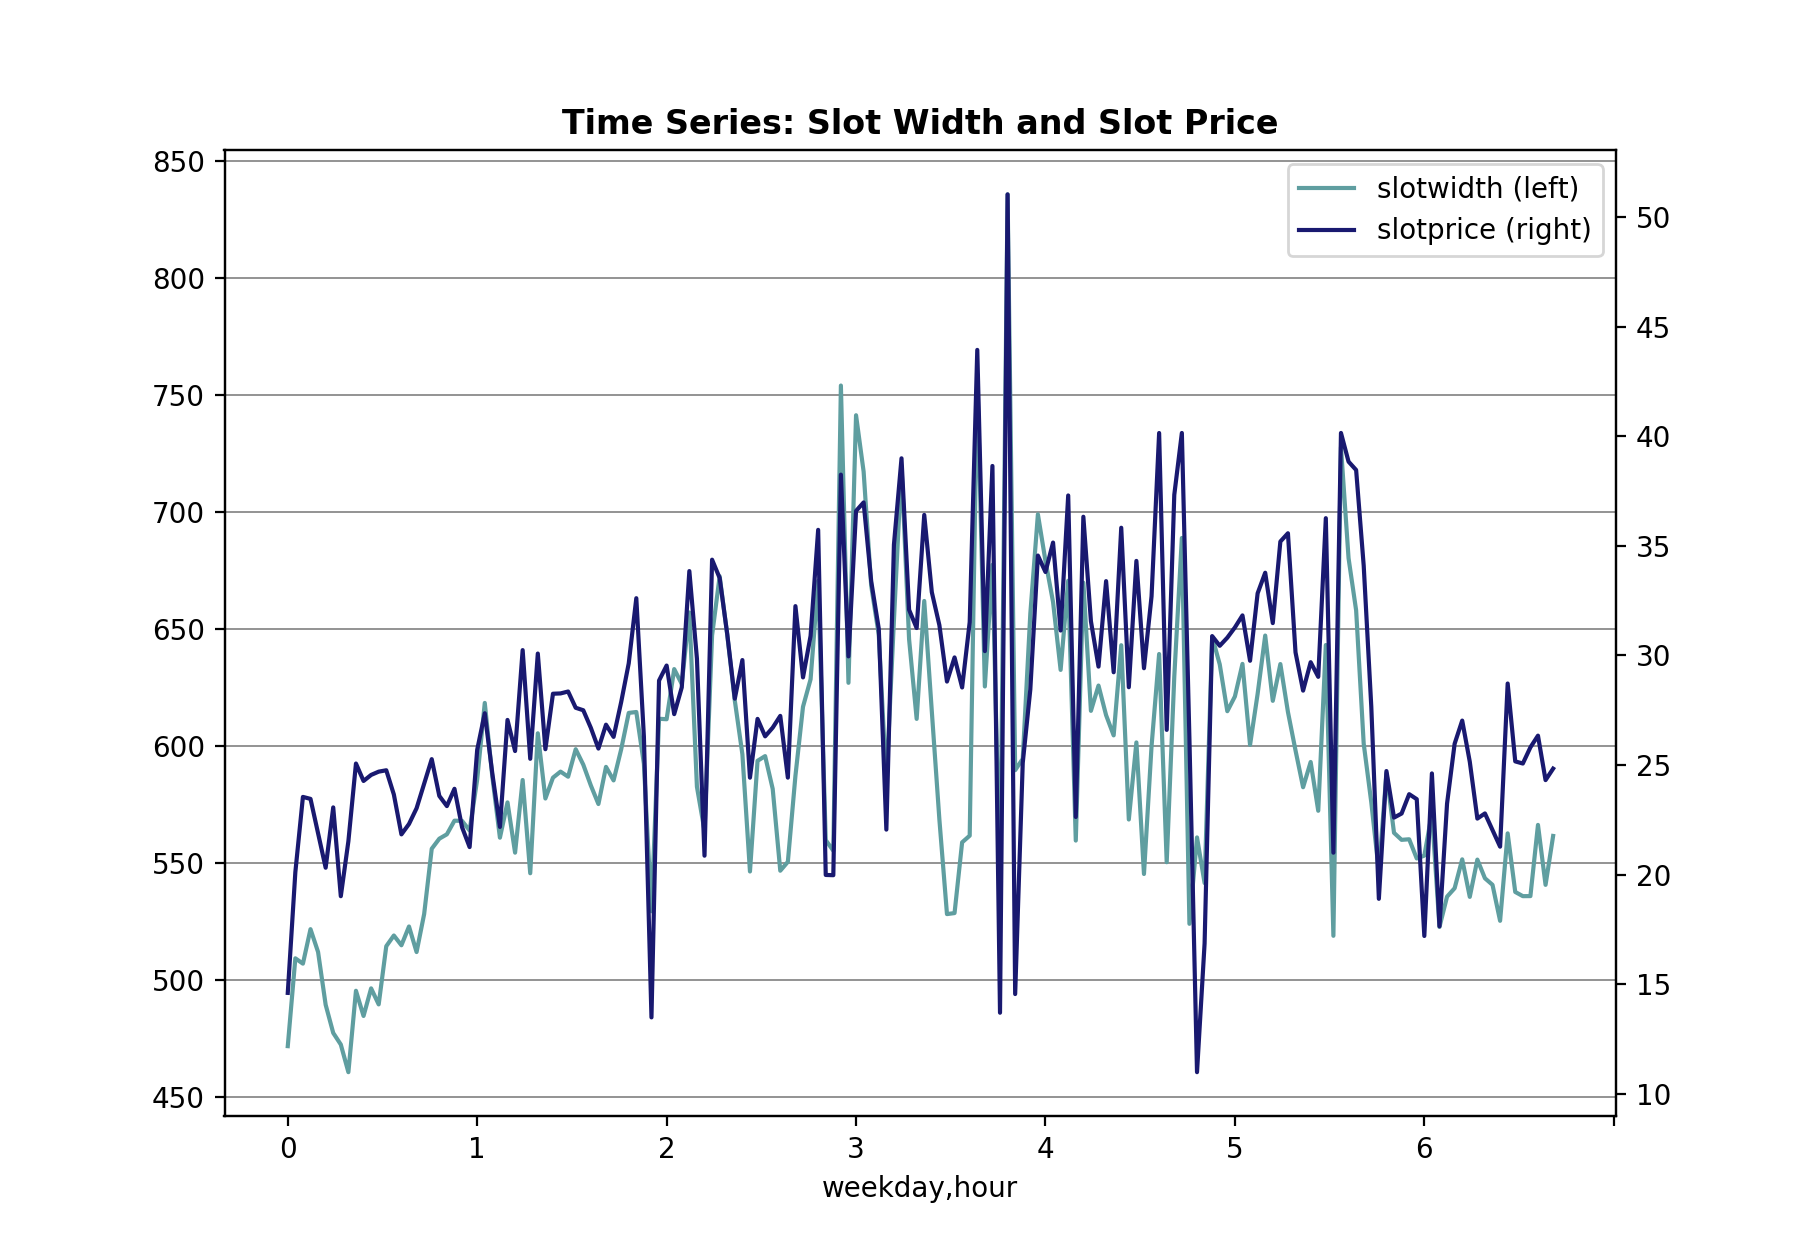

Text(0.5,1,'Time Series: Slot Width and Slot Price')

[Text(0,0,''),
 Text(0,0,'0'),
 Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'3'),
 Text(0,0,'4'),
 Text(0,0,'5'),
 Text(0,0,'6')]

In [63]:
time_df = pd.DataFrame(df.groupby(['weekday','hour']).mean(), columns = ['slotwidth' , 'slotprice'])
time_df.rename(index=str, columns={'click': 'average clicks', 'slotwidth': 'slotwidth (left)'}, inplace=True)

ax = time_df.plot(sharey=False, secondary_y = 'slotprice', color=color_schema)
ax.set_title("Time Series: Slot Width and Slot Price", fontweight = "bold")
ax.yaxis.grid(color='grey', linestyle='-', linewidth=0.6, zorder=0)
ax.set_xticklabels(["","0", "1","2","3","4","5", "6"])

In [20]:
%matplotlib inline

## eCPC

total pay price on clicks / clicks

<IPython.core.display.Javascript object>


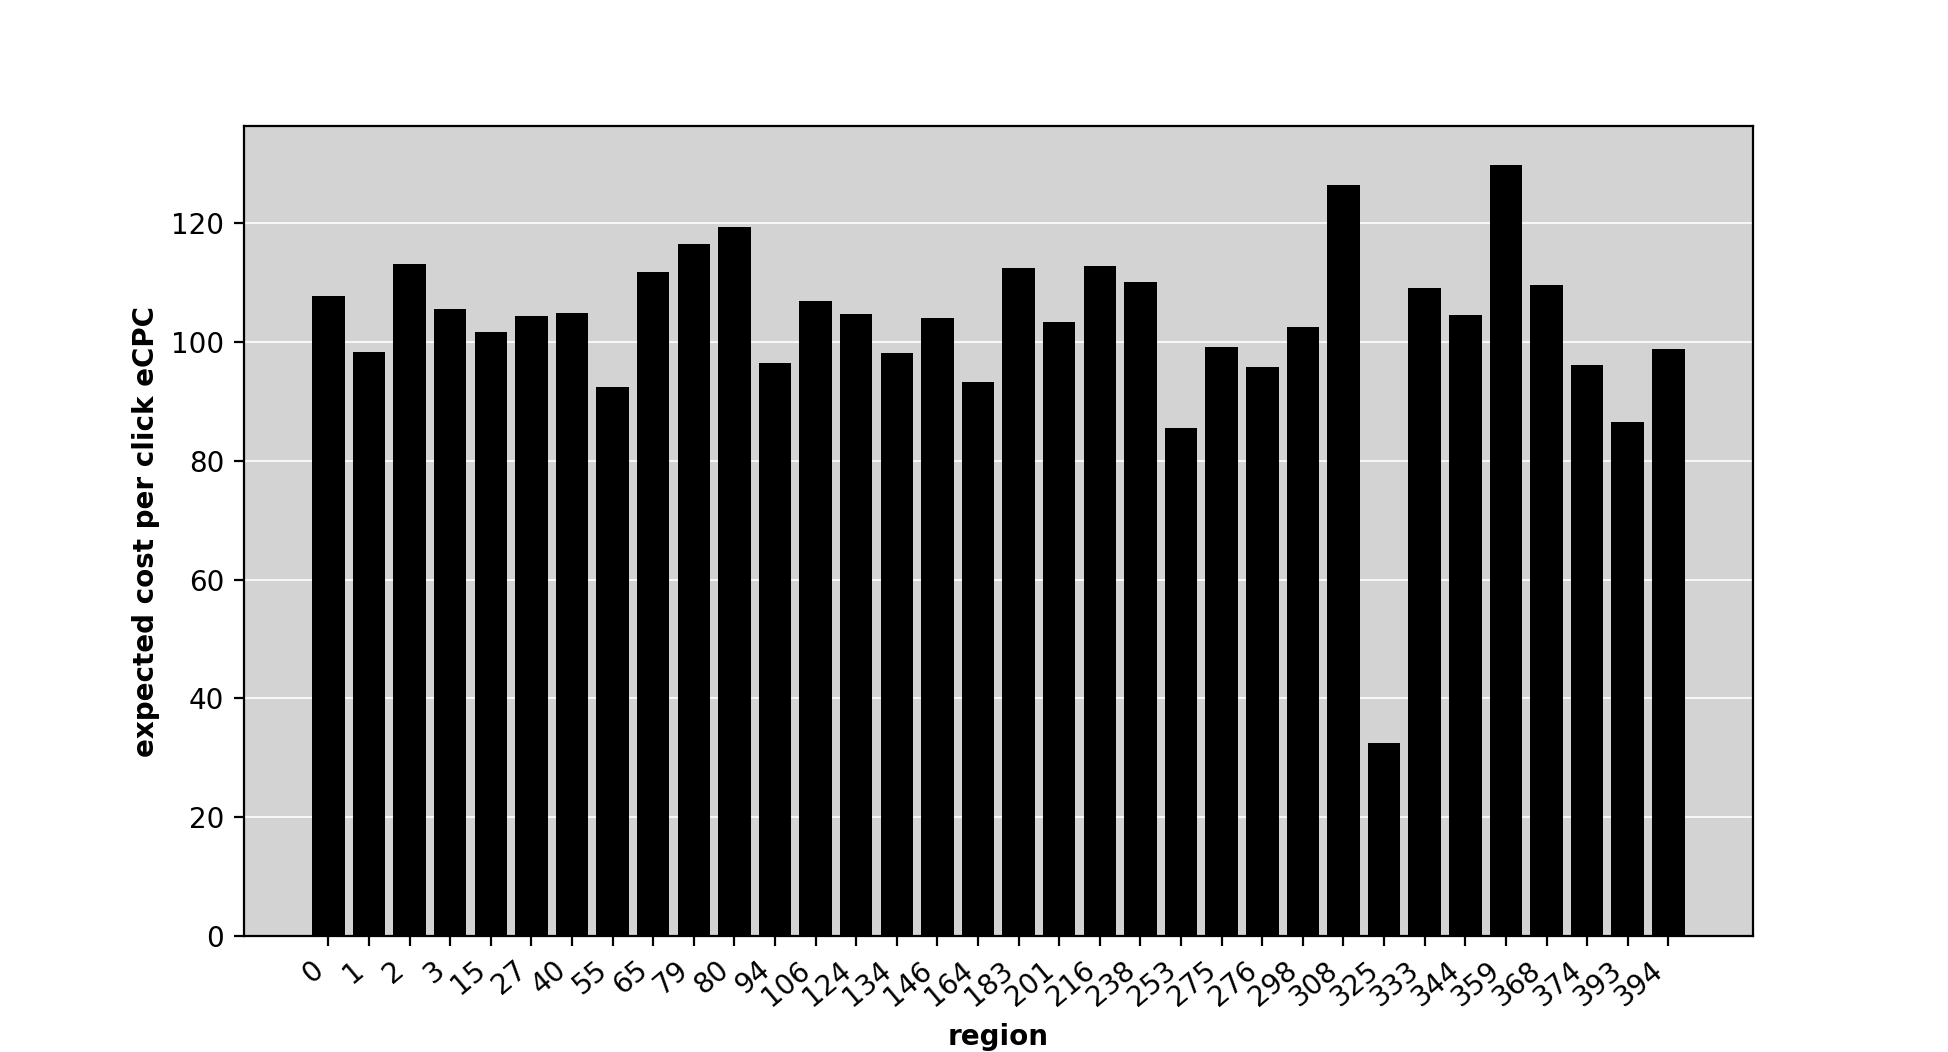

<BarContainer object of 34 artists>

Text(0,0.5,'expected cost per click eCPC')

Text(0.5,0,'region')

([<matplotlib.axis.XTick at 0x137396438>,
 <a list of 34 Text xticklabel objects>)

In [80]:
df_clicks = df.loc[df["click"] == 1]
df_clicks.reset_index(drop=True, inplace=True)

feature = 'region'
df_grouped = df_clicks.groupby([feature]).sum()

df_grouped['eCPC'] = df_grouped['payprice'] / (df_grouped['click'])

#print(df_grouped['eCPC'], "\n")
feature_data = df_grouped.index.tolist()
eCPC = df_grouped['eCPC'].values.tolist()


# data
height = eCPC
bars = feature_data
y_pos = np.arange(len(bars))

# Create bars
fig, ax = plt.subplots(1, 1)
ax.bar(y_pos, height, color = "black", zorder=3)
ax.set_facecolor('lightgrey')
plt.ylabel("expected cost per click eCPC", fontweight="bold")
plt.xlabel(str(feature), fontweight="bold")

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=40, ha="right")
ax.yaxis.grid(color='white', linestyle='-', linewidth=0.6, zorder=0)

# Show graphic
plt.show()



# eCPC for specific feature values____________

total_payprice = df.loc[(df["click"] == 1) & (df["weekday"] == 1), "payprice"].sum()
clicks = df.loc[(df["click"]) == 1 & (df["weekday"] == 1), "click"].sum()

## Accuracy Baselines

In [68]:
print(df['click'].value_counts())
print(1 - (df['click'].value_counts()[1] / df['click'].value_counts()[0]))

0.9993349203056733
